In [19]:
#import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
dataset = pd.read_csv('/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [21]:
dataset.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [22]:
# To find out whether there are 100 unique sneaker shops.
print(len(dataset['shop_id'].unique()))

100


In [23]:
dataset['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

Clearly we can see that the mean value 3145.128 is inaccurate since it is affeceted by a outlier value 704000.00


In [24]:
len(dataset[dataset['order_amount']==704000])

17

There are 17 orders having 704000.00 as the order amount which clearly an outlier which can be verified by the box plot.

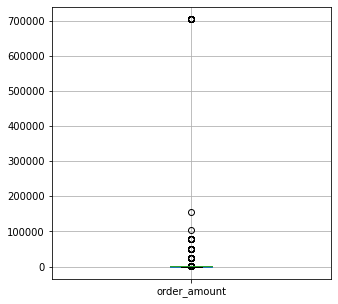

In [25]:
dataset.boxplot(column=['order_amount'],figsize=(5,5))

The interquartile range is the best measure of variability for skewed distributions or datasets with outliers. Because it's based on values that come from the middle half of the distribution, it's unlikely to be influenced by outliers.

In [26]:
# First quartile (Q1)
Q1 = np.percentile(dataset['order_amount'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(dataset['order_amount'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
  
print(IQR)

227.0


We can also find median of data considering only the 50 percentage of data i.e considering only the values which lie between the first and the third quartile leaving out the values which are too high and too low.

In [27]:
df = dataset[(dataset['order_id'] > 163) & (dataset['order_id'] < 390)]

In [28]:
# New Median
print(np.median(df['order_amount']))

272.0
